**CRAWL DỮ LIỆU TỪ WEB COINMARKETCAP.COM**

In [ ]:
# crawl dữ liệu từ web
#Import thư viện
import bs4
import pandas as pd
import requests
import lxml
from collections import Counter

search_url = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20200225&end=20200925'

data={
  'date' : [],
  'open' : [],
  'high' : [],
  'low' : [],
  'close': [],
  'volume' : [],
  'market_cap' : []
}

def get_coin_attributes(coin):
  date = coin.find('td',class_='cmc-table__cell cmc-table__cell--sticky cmc-table__cell--left').find('div').text
  open = coin.findAll('td',class_='cmc-table__cell cmc-table__cell--right')[0].get_text()
  high = coin.findAll('td',class_='cmc-table__cell cmc-table__cell--right')[1].get_text()
  low = coin.findAll('td',class_='cmc-table__cell cmc-table__cell--right')[2].get_text()
  close = coin.findAll('td',class_='cmc-table__cell cmc-table__cell--right')[3].get_text()
  volume = coin.findAll('td',class_='cmc-table__cell cmc-table__cell--right')[4].get_text()
  volume = volume.replace(',','')
  market_cap = coin.findAll('td',class_='cmc-table__cell cmc-table__cell--right')[5].get_text()
  market_cap = market_cap.replace(',','')

  data['date'].append(date)
  data['open'].append(open)
  data['high'].append(high)
  data['low'].append(low)
  data['close'].append(close)
  data['volume'].append(volume)
  data['market_cap'].append(market_cap)

#đưa vào file csv
def export_table(data):
  table = pd.DataFrame(data,columns=['date','open','high','low','close','volume','market_cap'])
  table.to_csv('data.csv', sep = ',' ,encoding ='utf-8', index=False)
  print(table)

def Get_Page_Contents(search_url):
  page = requests.get(search_url)
  #print(page)
  return bs4.BeautifulSoup(page.text,"lxml")

def parse_page(url):
  soup=Get_Page_Contents(url)
  list_coins = soup.findAll('tr',class_='cmc-table-row')
  for coin in list_coins: # crawl từng coin trong 1 page
    get_coin_attributes(coin)
  export_table(data)

parse_page(search_url)


             date    open    high     low   close       volume   market_cap
0    Sep 26, 2020  352.53  355.96  348.13  354.97  11036752997  40028658786
1    Sep 25, 2020  349.36  357.96  339.35  352.16  12254269350  39707796831
2    Sep 24, 2020  320.62  351.46  318.42  349.36  13460565701  39386790871
3    Sep 23, 2020  344.62  345.64  317.69  320.59  12047020995  36138749222
4    Sep 22, 2020  341.72  346.60  336.86  344.50  12732578043  38830213878
..            ...     ...     ...     ...     ...          ...          ...
210  Feb 29, 2020  226.83  232.26  219.85  219.85  18181296376  24162913195
211  Feb 28, 2020  226.99  234.21  216.35  226.76  22563530559  24919509265
212  Feb 27, 2020  225.69  237.23  212.66  226.75  25645522790  24915636231
213  Feb 26, 2020  247.74  249.65  221.27  225.68  26235617201  24794645345
214  Feb 25, 2020  265.28  265.43  246.86  247.82  21878882134  27223398195

[215 rows x 7 columns]


**FORMAT DỮ LIỆU TÌM RA MAX, MIN, AVERAGE VÀ ĐƯA VÀI FILE EXCEL**

In [ ]:
#read file and sort
import pandas as pd
df = pd.read_csv('data.csv')

modified={
    'Max': [],
    'Min':[],
    'Average' : []
}

idx = ['open','high','low','close','volume','market_cap']

#export to excel file
def export_excel(modified):
  ex = pd.DataFrame(modified,columns=['Max','Min','Average'],index= idx)
  ex.to_excel('modified.xlsx',index = True)
  print(ex)

for i in df.columns:
  result=i
  if(result != 'date'):
    Max=df[result].sort_values(ascending=False).iloc[0]
    Min=df[result].sort_values(ascending=True).iloc[0]
    Ave=df[result].mean()
    modified['Max'].append(Max)
    modified['Min'].append(Min)
    modified['Average'].append(Ave)

export_excel(modified)


                     Max           Min       Average
open        4.770100e+02  1.104100e+02  2.551329e+02
high        4.872100e+02  1.160200e+02  2.625497e+02
low         4.320800e+02  9.518000e+01  2.473912e+02
close       4.770500e+02  1.106100e+02  2.555336e+02
volume      3.142113e+10  5.109033e+09  1.390134e+10
market_cap  5.363393e+10  1.218048e+10  2.850923e+10


**THUẬT TOÁN PEARSON**

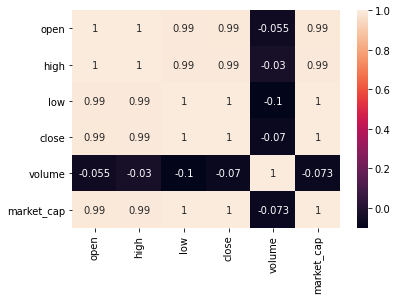

In [ ]:
#Pearson method
import math
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import colorsys
import numpy as np
import pandas as pd
df = pd.read_csv("data.csv")

pearson_data = {
    'open':[],
    'high':[],
    'low' :[],
    'close':[],
    'volume':[],
    'market_cap':[]
}

def average(x):
    if len(x) > 0:
      return float(sum(x)) / len(x)

def pearson_def(x, y):
    if len(x) == len(y):
      n = len(x)
      if n > 0:
        avg_x = average(x)
        avg_y = average(y)
        diffprod = 0
        xdiff2 = 0
        ydiff2 = 0
        for idx in range(n):
          xdiff = x[idx] - avg_x
          ydiff = y[idx] - avg_y
          diffprod += xdiff * ydiff
          xdiff2 += xdiff * xdiff
          ydiff2 += ydiff * ydiff

        return diffprod / math.sqrt(xdiff2 * ydiff2)

idx = ['open','high','low','close','volume','market_cap'] 

for i in range(len(df.columns)):
  j = df.columns[i]
  if (j != 'date'):
    for h in range(len(df.columns)):
      k= df.columns[h]
      if ( k != 'date'):
        x = pearson_def(df[j],df[k])
        pearson_data[j].append(x)

pear = pd.DataFrame(pearson_data,columns=['open','high','low','close','volume','market_cap'],index=idx)
sns.heatmap(pear, xticklabels=pear.columns, yticklabels=pear.columns, annot=True)
  


**THUẬT TOÁN SPEARMAN**

In [ ]:
#spear method
import pandas as pd
df = pd.read_csv('data.csv')

spear_data = {
    'open':[],
    'high':[],
    'low' :[],
    'close':[],
    'volume':[],
    'market_cap':[]
}

idx = ['open','high','low','close','volume','market_cap']

def abs_def(x,y):
  if (x>y):
    return x - y
  else:
    return y - x

def spear_def(x,y):
  if len(x) == len(y):
    n=len(x)
    if n > 0 :
      diffd = 0
      ndiff = 0
      for idx in range(n):
        xydiff = abs_def(x[idx],y[idx])
        diffd += xydiff * xydiff
      ndiff = n*(math.pow(n,2)-1)
      return 1 - ((6*diffd) / ndiff)

for i in range(len(df.columns)):
  j = df.columns[i]
  if (j != 'date'):
    x = df[j].rank()
    for h in range(len(df.columns)):
      k= df.columns[h]
      if ( k != 'date'):
        y=df[k].rank()
        z=spear_def(x,y)
        spear_data[j].append(z)

spear = pd.DataFrame(spear_data,columns=['open','high','low','close','volume','market_cap'],index = idx)

    


**BAYES ALGO**

In [ ]:
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
df = pd.read_csv('data.csv')
open_col = df['open'].head(30)
close_col = df['close'].head(30)
vol_col = df['volume'].head(31)


x=close_col - open_col 
h = []
for i in x:
  if i > 0 :
    h.append(1)
  else:
    h.append(0)

#tinh xác xuất tăng và giảm trong 1 tháng gần nhất 
count_up = 0
count_down = 0

for i in h:
  if i == 1:
    count_up += 1
  else:
    count_down += 1

P_up = count_up/len(h)
P_down = 1-P_up

#xác xuất volume tăng và x tăng 
vol_up_down = []
for i in range(len(vol_col)-1):
  if vol_col[i+1] - vol_col[i] < 0:
    vol_up_down.append(1)
  else :
    vol_up_down.append(0)


count_vol_h_up = 0
count_vol_up_h_down = 0
count_vol_down_h_up = 0
count_vol_down_h_down =0
for i in range(len(h)):
  if vol_up_down[i] == 1 and h[i] == 1:
    count_vol_h_up += 1
  elif vol_up_down[i] == 1 and h[i] == 0:
    count_vol_up_h_down+=1
  elif vol_up_down[i] == 0 and h[i] == 1:
    count_vol_down_h_up += 1
  else:
    count_vol_down_h_down += 1

P_v_up_h_up = count_vol_h_up/len(h)
P_v_up_h_down = count_vol_up_h_down/len(h)
P_v_down_h_up = count_vol_down_h_up/len(h)
P_v_down_h_down = count_vol_down_h_down/len(h)

def bayes_prediction(n):
  if n == 1:
    P_yes = P_v_up_h_up*P_up
    P_no = P_v_up_h_down *P_down
    P = P_yes/(P_yes + P_no)
    return P
  elif n == 0:
    P_yes = P_v_down_h_up * P_up
    P_no =  P_v_down_h_down *P_down
    P = P_yes / (P_yes+P_no)
    return 1 - P
vol_random= []
for i in range(len(h)):
  temp = random.randint(0,1)
  vol_random.append(temp)

predict = []
for i in vol_random:
  if bayes_prediction(i) > 0.5:
    predict.append(1)
  else:
    predict.append(0)
# đánh giá bằng độ đo Accuracy,Matrix,F1
y_true = []
y_pred = []
for i in h:
  y_true.append(i)

for j in predict:
  y_pred.append(j)

acc_result = accuracy_score(y_true, y_pred)
matrix_result = confusion_matrix(y_true, y_pred)
f1_result = f1_score(y_true, y_pred, average='weighted')


***APRIORI***

In [ ]:
import csv
import pandas as pd
import itertools
pd.options.mode.chained_assignment = None  # default='warn'
values_crawled = pd.read_csv('data.csv')
#________ Đưa dữ liệu về đúng định dạng của bài toán
def compare_values(a, b):
    return (True if a>b else False)
  

def compare_modify(df):
  for i in df.columns:
    for j in range(len(df[i])):
      if j == len(df[i])-1:
        df[i][j] = ''
        break
      if (compare_values(df[i][j],df[i][j+1])):
        df[i][j] = i
      else:
        df[i][j] = ''
  return df


def import_to_item(df):
  data = {
        'items' : []
      }
  df = compare_modify(df)
  for index, row in df.iterrows():
    item_list = []
    for i in row:
        if(i != 'date' and i != ''):
            item_list.append(i)
    data['items'].append(item_list)
  return pd.DataFrame(data, columns=['items'])

#--------- APRIORI ALGO

def itemset_C1_L1(data, num_trans, min_support):
    #Tính C1 
    C_1 = {}                           #Độ phổ biến của các hạng mục
    for transaction in data: 
        for item in transaction:
            if not item in C_1:
                C_1[item] = 1             #check xem item đã xuất hiện hay chưa, nếu chưa thì bắt đầu biến đếm bằng 1, nếu rồi thì cứ thế cộng lên
            else: C_1[item] +=1
    #Tính L1
    L_1 = []                             #Độ Phổ biến sau khi aplly min_sup
    support_1 = {}
    for candidate, count in sorted(C_1.items(), key=lambda x: x[0]):
        support = count / num_trans
        if support >= min_support:
            L_1.insert(0, [candidate])
            support_1[frozenset([candidate])] = count      #frozenset dùng để cố định giá trị để không thay đổi sau các lần
    return list(map(frozenset, sorted(L_1))), support_1, C_1  #Map(frozenset... ) froze tất cả các giá trị một cách nhanh chóng

def compute_CK(LK_, k):
    CK = []
    for i in range(len(LK_)):
        for j in range(i+1, len(LK_)): #liệt kê tất cả tổ hợp trong LK-1 
            L1 = sorted(list(LK_[i]))[:k-2]
            L2 = sorted(list(LK_[j]))[:k-2]
            if L1 == L2: # nếu k-1 phần tử đầu giống nhau, nối 2 mảng
                new_candidate = frozenset(sorted(LK_[i] | LK_[j]))
                CK.append(new_candidate)
    return sorted(CK)

def compute_LK(D, CK, num_trans, min_support):
    sup_count = {}
    for item in D:
        for candidate in CK:
            if candidate.issubset(item):         # check xem trong item đã có candidate chưa, nếu chưa thì khởi tạo...
                if not candidate in sup_count:
                    sup_count[candidate] = 1
                else: sup_count[candidate] += 1
    LK = []
    support_K = {}
    for candidate, count in sorted(sup_count.items(), key=lambda x: x[0]):
        support = count / num_trans
        if support >= min_support:
            LK.append(candidate)
            support_K[candidate] = count
    return sorted(LK), support_K

def apriori(data, min_support):
    D = sorted(list(map(set, data)))
    num_trans = len(D)
    L1, support_list, CK = itemset_C1_L1(data, num_trans, min_support)
    L = [L1]
    k = 1

    while(True): #tạo set k đến đi set thứ k-th rỗng
        k += 1
        CK = compute_CK(LK_=L[-1], k = k)
        LK, supportK = compute_LK(D, CK, num_trans, min_support)
        if len(CK) == 0:
            L = [sorted([tuple(sorted(list(itemset), key=lambda x: str(x))) for itemset in LK]) for LK in L] #L là list chứa các tuples, mỗi tuple chứa tổ hợp của các hạng mục
            support_list = dict((tuple(sorted(list(k), key=lambda x: str(x))), v) for k, v in support_list.items())
            break
        else:
            L.append(LK)
            support_list.update(supportK)
    return L, support_list

def generate_association_rules(patterns, confidence_threshold):
        # {(left): ((right), confidence)}

        rules = {}


        for itemset in patterns.keys():
            upper_support = patterns[itemset]

            for i in range(1, len(itemset)):
                for ante in itertools.combinations(itemset, i):
                    ante = tuple(sorted(ante))
                    conse = tuple(sorted(set(itemset) - set(ante)))

                    if ante in patterns:
                        lower_support = patterns[ante]
                        confi = float(upper_support) / lower_support

                        if confi >= confidence_threshold:
                            rules[ante] = (conse, confi)
        
        return rules

# ----------- RUN APRIORI------------
def apriori_df(df):
  table = import_to_item(df)

  transactions = []
  min_support = 0.2
  min_confidence = 0.5

  for i in range(len(table)):
      transactions.append(table['items'][i])

  L, support_list = apriori(transactions, min_support)
  print("======== Apriori List Support: ========\n", support_list)
  rules = generate_association_rules(support_list, min_confidence)
  print("======== Association rules Apriori: ========\n", rules, end = "\n ======== Apriori Done ========")
apriori_df(values_crawled)

======== Apriori List Support: ========
 {('close',): 119, ('high',): 103, ('low',): 139, ('market_cap',): 119, ('open',): 116, ('volume',): 105, ('close', 'low'): 97, ('close', 'market_cap'): 119, ('close', 'open'): 57, ('low', 'market_cap'): 97, ('low', 'open'): 90, ('market_cap', 'open'): 57, ('close', 'high'): 74, ('high', 'low'): 88, ('high', 'market_cap'): 74, ('high', 'open'): 76, ('close', 'volume'): 61, ('high', 'volume'): 72, ('low', 'volume'): 63, ('market_cap', 'volume'): 61, ('open', 'volume'): 64, ('close', 'low', 'market_cap'): 97, ('close', 'low', 'open'): 55, ('close', 'market_cap', 'open'): 57, ('low', 'market_cap', 'open'): 55, ('close', 'high', 'low'): 69, ('close', 'high', 'market_cap'): 74, ('close', 'high', 'open'): 49, ('high', 'low', 'market_cap'): 69, ('high', 'low', 'open'): 67, ('high', 'market_cap', 'open'): 49, ('close', 'low', 'volume'): 52, ('close', 'market_cap', 'volume'): 61, ('low', 'market_cap', 'volume'): 52, ('close', 'high', 'volume'): 55, ('high

***FP_GROWTH***

In [ ]:
import csv
import pandas as pd
import itertools
pd.options.mode.chained_assignment = None  # default='warn'
values_crawled = pd.read_csv('data.csv')
#________ Đưa dữ liệu về đúng định dạng của bài toán
def compare_values(a, b):
    return (True if a>b else False)
  

def compare_modify(df):
  for i in df.columns:
    for j in range(len(df[i])):
      if j == len(df[i])-1:
        df[i][j] = ''
        break
      if (compare_values(df[i][j],df[i][j+1])):
        df[i][j] = i
      else:
        df[i][j] = ''
  return df


def import_to_item(df):
  data = {
        'items' : []
      }
  df = compare_modify(df)
  for index, row in df.iterrows():
    item_list = []
    for i in row:
        if(i != 'date' and i != ''):
            item_list.append(i)
    data['items'].append(item_list)
  return pd.DataFrame(data, columns=['items'])

# ------------- FB-Growth --------------
class FBNode(object):
    
    def __init__(self, value, count, parent):

        self.value = value
        self.count = count
        self.parent = parent
        self.link = None
        self.children = []

    def get_child(self, value):
        # trả về node con với giá trị cụ thể
        for node in self.children:
            if node.value == value:
                return node
        return None

    def add_child(self, value):
        # thêm node child mới
        child = FBNode(value, 1, self)
        self.children.append(child)
        return child 

class FBTree(object):
    def __init__(self, transactions, threshold, root_value, root_count):
        # tạo cây

        self.frequent = self.find_frequent_items(transactions, threshold)
        self.headers = self.build_header_table(self.frequent)
        self.root = self.build_fbtree(transactions, root_value, root_count, self.frequent, self.headers)

    def build_header_table(self, frequent):
        headers = {}

        for key in frequent.keys():
            headers[key] = None

        return headers
    
    def find_frequent_items(self, transactions, threshold):
        # trả về một dict với độ phổ biến lớn hơn threshold
        items = {}
        
        for transaction in transactions:
            for item in transaction:
                if not item in items:
                    items[item] = 1
                else:
                    items[item] += 1
        for key in list(items.keys()):
            if items[key] < threshold:
                del items[key]

        return items

    def build_fbtree(self, transactions, root_value, root_count, frequent, headers):

        root = FBNode(root_value, root_count, None)

        for transaction in transactions:
            sorted_items = [x for x in transaction if x in frequent] # loại cái hạng mục bé hơn threshold ra trong transaction
            sorted_items.sort(key=lambda x: frequent[x], reverse = True) # sắp xếp giảm dần theo giá trị của frequent
            if len(sorted_items) > 0:
                self.insert_tree(sorted_items, root, headers)
        return root
    
    def insert_tree(self, items, node, headers):
        # đệ quy cây FB
        first = items[0]
        child = node.get_child(first)
        if child is not None:
            child.count += 1
        else:
            # thêm child
            child = node.add_child(first)

            # Link tới headers
            if headers[first] is None: # tạo nhánh mới
                headers[first] = child
            else: #tạo nhánh mới
                current = headers[first]
                while current.link is not None:
                    current = current.link
                current.link = child
        # đệ quy
        remain_items = items[1:]
        if len(remain_items) > 0:
            self.insert_tree(remain_items, child, headers)

    def tree_has_single_path(self, node):
        # True nếu chỉ có 1 đường đi duy nhất (single path) | cây không có lá

        num_children = len(node.children)
        if num_children > 1:
            return False
        elif num_children == 0: 
            return True
        else: # TH có 1 node con
            return True and self.tree_has_single_path(node.children[0])

    def zip_patterns(self, patterns):
        # gán thêm hậu tố vào patterns nếu đang ở conditional FB tree

        suffix = self.root.value

        if suffix is not None:
            # đang ở conditional FB tree
            new_patterns = {}
            for key in patterns.keys():
                new_patterns[tuple(sorted(list(key) + [suffix]))] = patterns[key]
            
            return new_patterns

        return patterns

    def generate_pattern_list(self):
        # tạo list của các tổ hợp và support count
        patterns = {}
        items = self.frequent.keys() # các hạng mục

        if self.root.value is None:
            suffix_value = []
        else:
            suffix_value = [self.root.value]
            patterns[tuple(suffix_value)] = self.root.count

        for i in range(1, len(items) + 1):
            for subset in itertools.combinations(items, i):
                pattern = tuple(sorted(list(subset) + suffix_value))
                patterns[pattern] = min([self.frequent[x] for x in subset])
                
        return patterns


    def mine_sub_trees(self, threshold):
        # tạo cây con và khai thắc để lấy tổ hợp

        patterns = {}
        mining_order = sorted(self.frequent.keys(), key=lambda x: self.frequent[x])

        #lấy hạng mục trong cây và đảo ngược thứ tự duyệt
        for item in mining_order:
            suffixes = []
            conditional_tree_input = []
            node = self.headers[item]

            #duyệt cái link của node để lấy list của số lần xuất hiện của item
            while node is not None:
                suffixes.append(node)
                node = node.link

            #với mỗi item, duyệt ngược về lại root
            for suffix in suffixes:
                frequency = suffix.count
                path = []
                parent = suffix.parent

                while parent.parent is not None:
                    path.append(parent.value)
                    parent = parent.parent

                for i in range(frequency):
                    conditional_tree_input.append(path)

            # đã tạo được input của subtree, khởi tạo và lấy patterns
            subtree = FBTree(conditional_tree_input, threshold, item, self.frequent[item])
            subtree_patterns = subtree.mine_patterns(threshold)

            #thêm pattern của subtree vào pattern chính
            for pattern in subtree_patterns.keys():
                if pattern in patterns:
                    patterns[pattern] += subtree_patterns[pattern]
                else:
                    patterns[pattern] = subtree_patterns[pattern]

        return patterns


    def mine_patterns(self, threshold):
        if self.tree_has_single_path(self.root):
            return self.generate_pattern_list()
        else:
            return self.zip_patterns(self.mine_sub_trees(threshold))

    def generate_association_rules(patterns, confidence_threshold):
        # {(left): ((right), confidence)}

        rules = {}


        for itemset in patterns.keys():
            upper_support = patterns[itemset]

            for i in range(1, len(itemset)):
                for ante in itertools.combinations(itemset, i):
                    ante = tuple(sorted(ante))
                    conse = tuple(sorted(set(itemset) - set(ante)))

                    if ante in patterns:
                        lower_support = patterns[ante]
                        confi = float(upper_support) / lower_support

                        if confi >= confidence_threshold:
                            rules[ante] = (conse, confi)
        
        return rules

def find_frequent_patterns(transactions, support_threshold):
    tree = FBTree(transactions, support_threshold, None, None)
    return tree.mine_patterns(support_threshold)

# ----------- RUN FP_GROWTH------------
def fpgrowth_df(df):
  table = import_to_item(df)

  transactions = []

  for i in range(len(table)):
      transactions.append(table['items'][i])

  min_support = 0.2 * len(transactions)
  min_confidence = 0.5

  support_list = find_frequent_patterns(transactions, min_support)
  print("\n======== FB-Growth List Support: ========\n", support_list)
  rules = FBTree.generate_association_rules(support_list, min_confidence)
  print("======== Association rules FB-Growth: ========\n", rules, end = "\n ======== FB-Growth Done ========")

fpgrowth_df(values_crawled)


======== FB-Growth List Support: ========
 {('high', 'open', 'volume'): 53, ('high', 'low', 'open', 'volume'): 44, ('close', 'high', 'volume'): 55, ('close', 'high', 'low', 'volume'): 50, ('high', 'market_cap', 'volume'): 55, ('close', 'high', 'market_cap', 'volume'): 55, ('high', 'low', 'market_cap', 'volume'): 50, ('close', 'high', 'low', 'market_cap', 'volume'): 50, ('high', 'low', 'volume'): 59, ('high', 'market_cap', 'open'): 49, ('high', 'low', 'market_cap', 'open'): 48, ('high', 'low', 'market_cap'): 69, ('close', 'high', 'open'): 49, ('close', 'high', 'low', 'open'): 48, ('close', 'high', 'market_cap', 'open'): 49, ('close', 'high', 'low', 'market_cap', 'open'): 48, ('close', 'high', 'low'): 69, ('close', 'high', 'low', 'market_cap'): 69, ('close', 'high', 'market_cap'): 74, ('high', 'open'): 76, ('high', 'low', 'open'): 67, ('high', 'low'): 88, ('market_cap', 'volume'): 61, ('low', 'market_cap', 'volume'): 52, ('close', 'volume'): 61, ('close', 'market_cap', 'volume'): 61, ('

**THREAD**

In [ ]:
#thread
from threading import Thread
import threading
import time

pd.options.mode.chained_assignment = None  # default='warn'
def thread_check(df):
  try:
    t = time.time()
    t1 = threading.Thread(target=apriori_df,args=(df,))
    t2 = threading.Thread(target=fpgrowth_df,args=(df,))
    t1.start()
    t2.start()
    t1.join()
    t2.join()
    print ("\nDone in ", time.time()- t)
  except:
    print ("error")
thread_check(values_crawled)

======== Apriori List Support: ========
 {('close',): 62, ('market_cap',): 62, ('open',): 61, ('volume',): 62, ('close', 'market_cap'): 62}
======== Association rules Apriori: ========
 {('close',): (('market_cap',), 1.0), ('market_cap',): (('close',), 1.0)}
 ======== Apriori Done ========
======== FB-Growth List Support: ========
 {('open',): 61, ('close',): 62, ('volume',): 62, ('market_cap',): 62, ('close', 'market_cap'): 62}
======== Association rules FB-Growth: ========
 {('close',): (('market_cap',), 1.0), ('market_cap',): (('close',), 1.0)}
 ======== FB-Growth Done ========
Done in  0.4492483139038086
